# Implementing Oversampling and Undersampling on unbalanced Cervical Cancer Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import Cervical Cancer Dataset
cervical_cancer_df = pd.read_csv('./Dataset/kag_risk_factors_cervical_cancer.csv')

In [38]:
# Class distribution before sampling
cervical_cancer_df['Biopsy'].value_counts()

Biopsy
0    803
1     55
Name: count, dtype: int64

In [16]:
# Separate features and target
x = cervical_cancer_df.drop(columns=['Biopsy'])
y = cervical_cancer_df['Biopsy']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print('Before Sampling\n', X_train.value_counts())

Before Sampling
 Age  Number of sexual partners  First sexual intercourse  Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  IUD (years)  STDs  STDs (number)  STDs:condylomatosis  STDs:cervical condylomatosis  STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  STDs:syphilis  STDs:pelvic inflammatory disease  STDs:genital herpes  STDs:molluscum contagiosum  STDs:AIDS  STDs:HIV  STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  STDs: Time since first diagnosis  STDs: Time since last diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology
15   1.0                        14.0                      1.0                 0.0     0.0             0.0                  0.0                      0.0                              0.0  0.0          0.0   0.0            0.0                  0.0                           0.0                          0.0                                 0.0     

In [17]:
from imblearn.over_sampling import SMOTE

# Convert all columns to numeric, replace '?' with NaN, then fill NaN with median (or 0)
X_train_numeric = X_train.replace('?', np.nan).apply(pd.to_numeric, errors='coerce')
X_train_filled = X_train_numeric.fillna(X_train_numeric.median())

smote = SMOTE(random_state=42)

# Apply SMOTE to X_train and y_train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_filled, y_train)

print('After SMOTE\n', pd.DataFrame(X_train_resampled).value_counts())
print('\nResampled y distribution\n', pd.Series(y_train_resampled).value_counts()/858)

After SMOTE
 Age  Number of sexual partners  First sexual intercourse  Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  IUD (years)  STDs      STDs (number)  STDs:condylomatosis  STDs:cervical condylomatosis  STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  STDs:syphilis  STDs:pelvic inflammatory disease  STDs:genital herpes  STDs:molluscum contagiosum  STDs:AIDS  STDs:HIV  STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  STDs: Time since first diagnosis  STDs: Time since last diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology
21   1.000000                   17.000000                 2.000000            0.0     0.0             0.000000             1.000000                 3.000000                         0.0  0.0          0.000000  0.000000       0.0                  0.0                           0.0                          0.0                                 0.0 

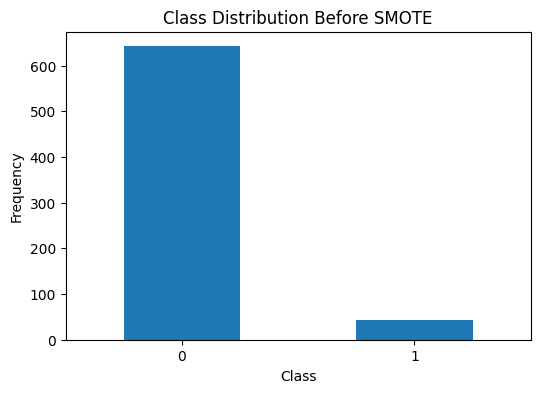

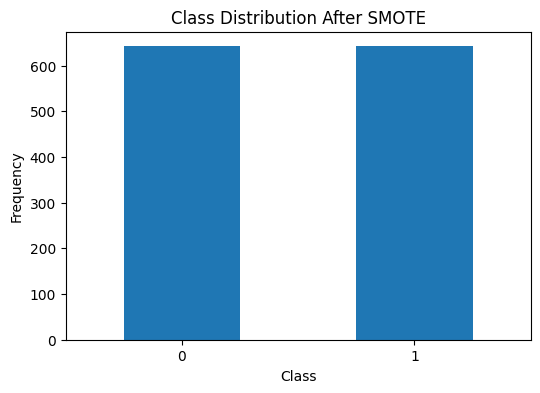

In [18]:
# Visualizing the results before and after applying SMOTE

import matplotlib.pyplot as plt

# Function to plot class distribution
def plot_class_distribution(y, title):
    plt.figure(figsize=(6, 4))
    y.value_counts().plot(kind='bar')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()

# Plot before SMOTE
plot_class_distribution(y_train, 'Class Distribution Before SMOTE')

# Plot after SMOTE
plot_class_distribution(y_train_resampled, 'Class Distribution After SMOTE')


## Implementing ADASYN

In [21]:
# Applying ADASYN
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

# Apply ADASYN to X_train and y_train
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_filled, y_train)

print('After ADASYN\n', pd.DataFrame(X_train_adasyn).value_counts())
print('\nResampled y distribution\n', pd.Series(y_train_adasyn).value_counts())


After ADASYN
 Age  Number of sexual partners  First sexual intercourse  Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  IUD (years)  STDs      STDs (number)  STDs:condylomatosis  STDs:cervical condylomatosis  STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  STDs:syphilis  STDs:pelvic inflammatory disease  STDs:genital herpes  STDs:molluscum contagiosum  STDs:AIDS  STDs:HIV  STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  STDs: Time since first diagnosis  STDs: Time since last diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology
21   1.000000                   17.000000                 2.000000            0.0     0.000000        0.000000             1.000000                 3.000000                         0.0  0.0          0.000000  0.000000       0.0                  0.0                           0.0                          0.0                                 0.0

# Applying Hybrid Approach

In [22]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)

# Apply SMOTETomek to X_train and y_train
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train_filled, y_train)

print('After SMOTETomek\n', pd.DataFrame(X_train_smote_tomek).value_counts())
print('\nResampled y distribution\n', pd.Series(y_train_smote_tomek).value_counts())


After SMOTETomek
 Age  Number of sexual partners  First sexual intercourse  Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  IUD (years)  STDs      STDs (number)  STDs:condylomatosis  STDs:cervical condylomatosis  STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  STDs:syphilis  STDs:pelvic inflammatory disease  STDs:genital herpes  STDs:molluscum contagiosum  STDs:AIDS  STDs:HIV  STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  STDs: Time since first diagnosis  STDs: Time since last diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology
21   1.000000                   17.000000                 2.000000            0.0     0.0             0.000000             1.000000                 3.000000                         0.0  0.0          0.000000  0.000000       0.0                  0.0                           0.0                          0.0                                

Random Forest Classifier with SMOTE
Training Accuracy: 1.0
Validation Accuracy: 1.0


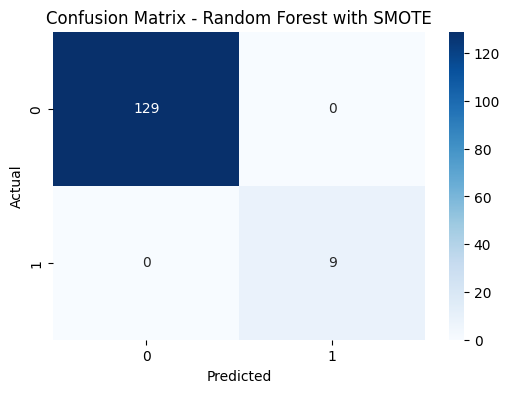

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00         9

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [30]:
# Training Random Forest Classifier on all three SMOTE methods and compare results
# Training Random Forest Classifier on SMOTE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Split X_train_filled and y_train into train and validation sets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
	X_train_filled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
print("Random Forest Classifier with SMOTE")
print("Training Accuracy:", rf_smote.score(X_train_resampled, y_train_resampled))
print("Validation Accuracy:", rf_smote.score(X_val, y_val))
# Confusion Matrix
confusion_matrix_forest = pd.crosstab(y_val, rf_smote.predict(X_val), rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_forest, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest with SMOTE")
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, rf_smote.predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00         9

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



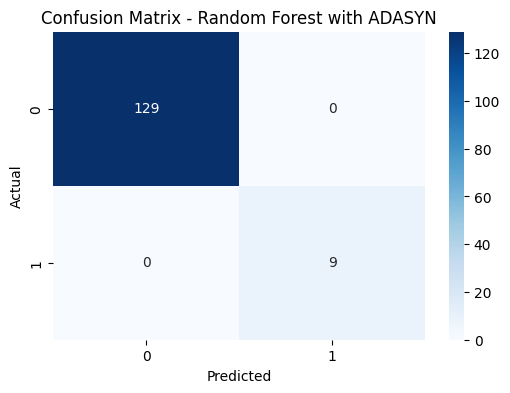

Random Forest Classifier with ADASYN
Training Accuracy: 1.0
Validation Accuracy: 1.0


In [33]:
# Training Random Forest Classifier on ADASYN
rf_adasyn = RandomForestClassifier(random_state=42)
rf_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Evaluating the Random Forest Classifier
y_pred_adasyn = rf_adasyn.predict(X_val)

# Print classification report
print(classification_report(y_val, y_pred_adasyn))
# Print confusion matrix
confusion_matrix_adasyn = pd.crosstab(y_val, y_pred_adasyn, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_adasyn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest with ADASYN")
plt.show()
# Printing accuracy
print("Random Forest Classifier with ADASYN")
print("Training Accuracy:", rf_adasyn.score(X_train_adasyn, y_train_adasyn))
print("Validation Accuracy:", rf_adasyn.score(X_val, y_val))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       129
           1       1.00      0.89      0.94         9

    accuracy                           0.99       138
   macro avg       1.00      0.94      0.97       138
weighted avg       0.99      0.99      0.99       138



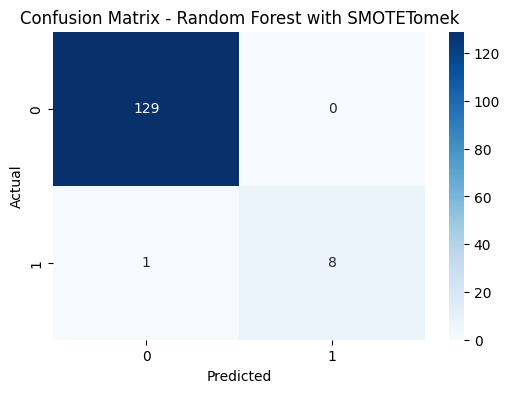

Random Forest Classifier with SMOTETomek
Training Accuracy: 1.0
Validation Accuracy: 0.9927536231884058


In [35]:
# Training Random Forest Classifier on Hybrid SMOTE
rf_SMOTETomek = RandomForestClassifier(random_state=42)
rf_SMOTETomek.fit(X_train_smote_tomek, y_train_smote_tomek)

# Evaluating the Random Forest Classifier
y_pred_SMOTETomek = rf_SMOTETomek.predict(X_val)

# Print classification report
print(classification_report(y_val, y_pred_SMOTETomek))

# Print confusion matrix
confusion_matrix_SMOTETomek = pd.crosstab(y_val, y_pred_SMOTETomek, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_SMOTETomek, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest with SMOTETomek")
plt.show()

# Printing accuracy
print("Random Forest Classifier with SMOTETomek")
print("Training Accuracy:", rf_SMOTETomek.score(X_train_smote_tomek, y_train_smote_tomek))
print("Validation Accuracy:", rf_SMOTETomek.score(X_val, y_val))